# Análisis y Clasificación del Estado del Ojo con Modelos de Machine Learning


# **Introducción:**

Este proyecto tiene como objetivo identificar y clasificar el estado del ojo (abierto o cerrado) utilizando datos de electroencefalografía (EEG). Para lograrlo, realizamos un análisis del dataset estado_ojo_EEG.csv, se implementaron diversas técnicas de detección de outliers, reducción de dimensionalidad y construcción de modelos predictivos. A lo largo del análisis, se evaluaron múltiples enfoques y modelos, determinando cuál era el más adecuado para este problema. A continuación, se detalla cada paso realizado y los resultados obtenidos.

# **Estructura del proyecto:**

**1.   Detección de Outliers:**

La detección de datos atípicos es crucial para garantizar que los modelos predictivos no se vean afectados por valores extremos. Para este fin, se utilizaron dos algoritmos complementarios:

**K-Nearest Neighbors (KNN):** Este algoritmo detecta outliers al medir la distancia entre un punto y sus vecinos más cercanos. Los puntos que se encuentran significativamente alejados de sus vecinos son identificados como atípicos.

**Isolation Forest (IF):** Este algoritmo de detección aísla los datos atípicos mediante la creación de particiones aleatorias en el espacio de características. Los outliers requieren menos divisiones para ser aislados, ya que suelen estar más alejados del resto de los datos.
Con estos dos enfoques, ***se identificó que el ID 11510 ***es un outlier en el conjunto de datos. Ambos métodos coincidieron, lo que valida su exclusión para evitar distorsiones en los resultados del modelo predictivo.

**2. Reducción de Dimensionalidad:**

Para facilitar la visualización y comprensión de los datos, se aplicó el **Análisis de Componentes Principales (PCA)**. Este método permitió reducir el dataset a dos componentes principales, facilitando una representación gráfica de los datos. Aunque se observó cierta superposición entre los estados del ojo (abierto o cerrado), no se evidenció una clara separación basada únicamente en estas dos variables, lo que sugiere la necesidad de considerar más características para mejorar la clasificación.

**3. División del Dataset:**

Para asegurar un entrenamiento y evaluación efectivos, se dividió el conjunto de datos en dos partes: **un 70% para entrenamiento y un 30% para testeo**. Esta división permite evaluar el rendimiento de los modelos en datos no vistos y evita el sobreajuste. Además, se utilizó la semilla 42 para garantizar la replicabilidad de los resultados.

**4.  Modelado Predictivo:**

Se probaron varios modelos de clasificación para predecir el estado del ojo, evaluando su rendimiento a través de métricas como la precisión, recall, F1-score, y la curva ROC-AUC. Los modelos evaluados fueron los siguientes:


***   Regresión Logística:** Este modelo estadístico asume una relación lineal entre las variables independientes y la probabilidad del estado del ojo. Aunque es un enfoque simple, presentó un rendimiento moderado con un **AUC de 0.67**, lo que indica que su capacidad para diferenciar entre las clases es limitada, especialmente en la clase minoritaria (estado del ojo cerrado).

***   Árbol de Decisión:** Este modelo divide los datos en función de características clave, permitiendo capturar relaciones no lineales. El árbol de decisión mejoró significativamente el rendimiento con un **AUC de 0.83**, mostrando una mayor precisión en la predicción del estado del ojo, especialmente en la clase positiva.

***  Red Neuronal:** Se entrenó una red neuronal con dos capas ocultas. Sin embargo, a pesar de su complejidad, no produjo buenos resultados, obteniendo un AUC de 0.50, lo que indica una capacidad de predicción similar a la aleatoria. La red solo logró predecir correctamente la clase negativa (ojo abierto), fallando por completo en la predicción de la clase positiva.

***   Random Forest (Bonus)**: Finalmente, se implementó un Random Forest, un modelo basado en la combinación de múltiples árboles de decisión, que ofrece robustez ante el sobreajuste y maneja mejor la complejidad de los datos. Este modelo resultó ser el más preciso de todos, con una **precisión del 99% y un AUC de 0.9997**, lo que indica una capacidad casi perfecta para discriminar entre las clases. La flexibilidad y capacidad del Random Forest para manejar datos no lineales y características complejas lo convirtieron en la mejor opción para este problema.



In [ ]:
# Librerías necesarias
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
df = pd.read_csv("estado_ojo_EEG.csv")
# Definimos las características que utilizarás para el análisis
features = df.drop(['ID', 'Estado_Ojo'], axis=1)
# Definimos las características que utilizarás para el análisis
features = df.drop(['ID', 'Estado_Ojo'], axis=1)

# KNN para detectar outliers
knn = NearestNeighbors(n_neighbors=5)
knn.fit(features)
distances, _ = knn.kneighbors(features)
distance_threshold = np.percentile(distances[:, -1], 95)  # 95 percentiles para el threshold
df['outlier_knn'] = distances[:, -1] > distance_threshold

# Isolation Forest para detectar outliers
isolation_forest = IsolationForest(contamination=0.05, random_state=42)  # Contaminación del 5%
df['outlier_if'] = isolation_forest.fit_predict(features)
df['outlier_if'] = df['outlier_if'] == -1  # Convertir a booleano

# Determinar outliers que son considerados por ambos métodos
df['outlier_both'] = df['outlier_knn'] & df['outlier_if']

# Contar los outliers encontrados por cada método y los que son considerados por ambos
outliers_knn = df['outlier_knn'].sum()
outliers_if = df['outlier_if'].sum()
outliers_both = df['outlier_both'].sum()

print(f"Número de outliers detectados por KNN: {outliers_knn}")
print(f"Número de outliers detectados por Isolation Forest: {outliers_if}")
print(f"Número de outliers detectados por ambos métodos: {outliers_both}")

# Separar el 5% de los datos atípicos
df_outliers_knn = df[df['outlier_knn']].sample(frac=0.05, random_state=42)
df_outliers_if = df[df['outlier_if']].sample(frac=0.05, random_state=42)
df_outliers_both = df[df['outlier_both']].sample(frac=0.05, random_state=42)

# Guardar los outliers en archivos CSV
df_outliers_knn.to_csv('outliers_knn.csv', index=False)
df_outliers_if.to_csv('outliers_if.csv', index=False)
df_outliers_both.to_csv('outliers_both.csv', index=False)

Número de outliers detectados por KNN: 749
Número de outliers detectados por Isolation Forest: 749
Número de outliers detectados por ambos métodos: 167


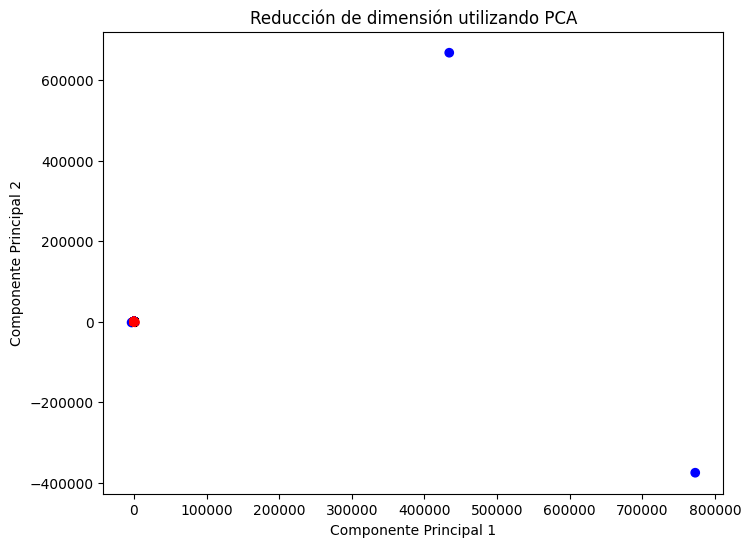

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Crear un DataFrame con las dos dimensiones y el estado del ojo
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Estado_Ojo'] = df['Estado_Ojo']

# Graficar las dos dimensiones
plt.figure(figsize=(8,6))
colors = {0:'blue', 1:'red'}
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Estado_Ojo'].map(colors))
plt.title("Reducción de dimensión utilizando PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()


## **Regresión Logística**

In [ ]:
from sklearn.model_selection import train_test_split

# Separar los datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, df['Estado_Ojo'], test_size=0.30, random_state=42)


Matriz de Confusión:
 [[1888  498]
 [1152  956]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.62      0.79      0.70      2386
           1       0.66      0.45      0.54      2108

    accuracy                           0.63      4494
   macro avg       0.64      0.62      0.62      4494
weighted avg       0.64      0.63      0.62      4494



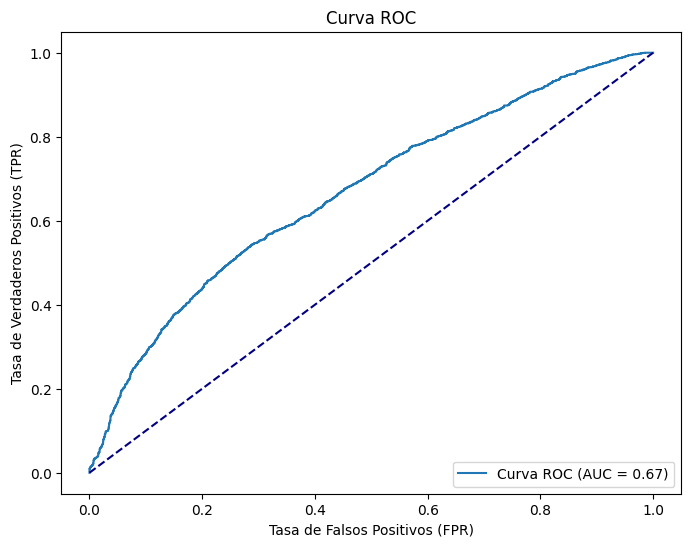

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Entrenar el modelo de regresión logística
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predecir en el conjunto de test
y_pred = log_reg.predict(X_test)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:\n", conf_matrix)

# Métricas de desempeño
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))

# Curva ROC
y_pred_prob = log_reg.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


## **Árbol de decisión**

In [ ]:
#Importar librerias necesarias

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt



In [ ]:
# Crear el modelo de Árbol de Decisión
tree_model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
# Hacer predicciones en el set de test
y_pred_tree = tree_model.predict(X_test)

# Matriz de confusión
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print("Matriz de Confusión del Árbol de Decisión:\n", conf_matrix_tree)


Matriz de Confusión del Árbol de Decisión:
 [[2040  346]
 [ 414 1694]]


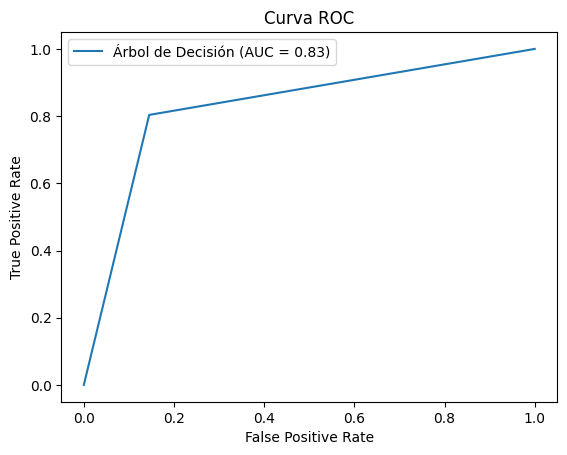

In [ ]:
# Obtener las probabilidades para la clase positiva
y_pred_proba_tree = tree_model.predict_proba(X_test)[:, 1]

# Calcular el AUC
roc_auc_tree = roc_auc_score(y_test, y_pred_proba_tree)

# Graficar la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_tree)
plt.plot(fpr, tpr, label=f'Árbol de Decisión (AUC = {roc_auc_tree:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.show()


## **Red Neuronal**

In [ ]:
#importar las librerías necesarias
from sklearn.neural_network import MLPClassifier


In [ ]:
# Crear la red neuronal con dos capas ocultas de 14 y 4 neuronas respectivamente
nn_model = MLPClassifier(hidden_layer_sizes=(14, 4), random_state=42, max_iter=1000)

# Entrenar el modelo
nn_model.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(14, 4), max_iter=1000, random_state=42)

In [ ]:
# Hacer predicciones en el set de test
y_pred_nn = nn_model.predict(X_test)

# Matriz de confusión
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
print("Matriz de Confusión de la Red Neuronal:\n", conf_matrix_nn)


Matriz de Confusión de la Red Neuronal:
 [[2384    2]
 [2108    0]]


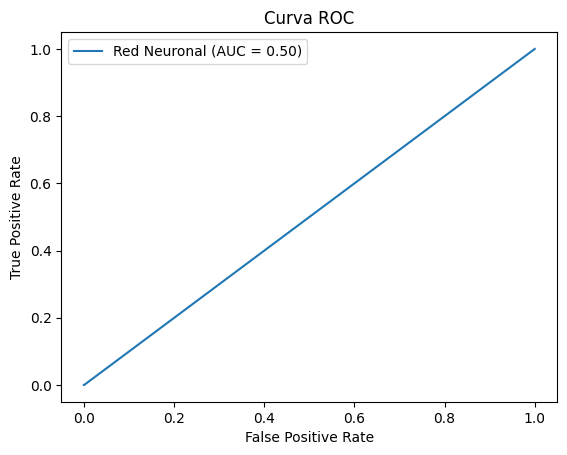

In [ ]:
# Obtener las probabilidades para la clase positiva
y_pred_proba_nn = nn_model.predict_proba(X_test)[:, 1]

# Calcular el AUC
roc_auc_nn = roc_auc_score(y_test, y_pred_proba_nn)

# Graficar la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_nn)
plt.plot(fpr, tpr, label=f'Red Neuronal (AUC = {roc_auc_nn:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.show()


# **A continuación implementaremos un Random Forest**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# Imprimir los nombres de las columnas para verificar
print("Nombres de las columnas en el DataFrame:")
print(df.columns)

# Definir las características y la variable objetivo
X = df.drop('Estado_Ojo', axis=1)  # Usar el nombre correcto
y = df['Estado_Ojo']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el clasificador
rf = RandomForestClassifier(random_state=42)

# Definir el rango de hiperparámetros a probar
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles en el bosque
    'max_features': ['auto', 'sqrt'],  # Número de características a considerar para la mejor división
    'max_depth': [None, 10, 20, 30],  # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],  # Mínimo número de muestras necesarias para dividir un nodo
    'min_samples_leaf': [1, 2, 4]  # Mínimo número de muestras necesarias para estar en un nodo hoja
}

# Usar GridSearchCV para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Mejor modelo
best_rf = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred = best_rf.predict(X_test)

# Evaluar el modelo
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1]))
print("Accuracy:", accuracy_score(y_test, y_pred))


Nombres de las columnas en el DataFrame:
Index(['ID', 'AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8',
       'FC6', 'F4', 'F8', 'AF4', 'Estado_Ojo', 'outlier_knn', 'outlier_if',
       'outlier_both'],
      dtype='object')
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py"

Matriz de Confusión:
[[1585    1]
 [  26 1384]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1586
           1       1.00      0.98      0.99      1410

    accuracy                           0.99      2996
   macro avg       0.99      0.99      0.99      2996
weighted avg       0.99      0.99      0.99      2996

AUC: 0.9997151494012325
Accuracy: 0.9909879839786382


# Conclusiones



**a) ¿Es el ID 11510 un dato atípico?**

La identificación del ID 11510 como un outlier fue consistente entre los dos métodos utilizados (KNN e Isolation Forest). Esto refuerza la decisión de excluir este dato para evitar su influencia en el modelo predictivo.

**b) Reducción de Dimensionalidad a 2 Variables**

El PCA reveló que no existe una separación clara entre los estados del ojo (abierto o cerrado) utilizando solo las dos principales componentes. Este resultado sugiere que más características deben ser consideradas para mejorar la capacidad de clasificación.

**c) División del Dataset**

La división del dataset en un 70% para entrenamiento y 30% para testeo, junto con el uso de una semilla de replicación, garantizó una evaluación fiable y replicable del rendimiento de los modelos.

**d) Modelos de Clasificación**

***   La Regresión Logística** presentó un rendimiento moderado con un AUC de 0.67, lo que indica que este enfoque tiene dificultades para predecir correctamente la clase positiva.Elemento de lista

***   El Árbol de Decisión** fue más efectivo, con un AUC de 0.83, mostrando una capacidad significativamente mejor para diferenciar entre los estados del ojo

***   La Red Neuronal** falló en predecir la clase positiva, con un AUC de 0.50, lo que refleja un comportamiento equivalente al azar.

***   El Random Forest**, por su parte, fue el modelo más preciso, logrando un AUC de 0.9997 y una precisión del 99%. Esto lo convierte en la opción más adecuada para este conjunto de datos, superando a los demás modelos tanto en rendimiento como en capacidad de discriminación.

**Conclusión General:**

**El Random Forest** demostró ser el modelo más eficaz para este conjunto de datos, con una **precisión casi perfecta y un AUC de 0.9997**. Aunque el Árbol de Decisión también mostró un rendimiento sólido, el **Random Forest superó a todos los modelos evaluado**s, manejando con éxito las complejidades del dataset y maximizando tanto la precisión como la discriminación entre clases. La detección de outliers, la reducción de dimensionalidad y la correcta división del dataset fueron pasos clave que contribuyeron al éxito de este análisis.